In [3]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
#hide
from fastai.vision.all import *
from fastbook import *

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

matplotlib.rc('image', cmap='Greys')

In [6]:

path = untar_data(URLs.MNIST)

trainset = datasets.MNIST('train/', download=True, train=True, transform=transforms.ToTensor())
valset = datasets.MNIST('valid/', download=True, train=False, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 104993146.82it/s]


Extracting train/MNIST/raw/train-images-idx3-ubyte.gz to train/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 99700159.53it/s]


Extracting train/MNIST/raw/train-labels-idx1-ubyte.gz to train/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30573016.09it/s]


Extracting train/MNIST/raw/t10k-images-idx3-ubyte.gz to train/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7509077.17it/s]


Extracting train/MNIST/raw/t10k-labels-idx1-ubyte.gz to train/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 110385809.38it/s]

Extracting valid/MNIST/raw/train-images-idx3-ubyte.gz to valid/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 99291552.31it/s]

Extracting valid/MNIST/raw/train-labels-idx1-ubyte.gz to valid/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 29078159.91it/s]


Extracting valid/MNIST/raw/t10k-images-idx3-ubyte.gz to valid/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4409844.62it/s]


Extracting valid/MNIST/raw/t10k-labels-idx1-ubyte.gz to valid/MNIST/raw



torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([128])
torch.Size([128])


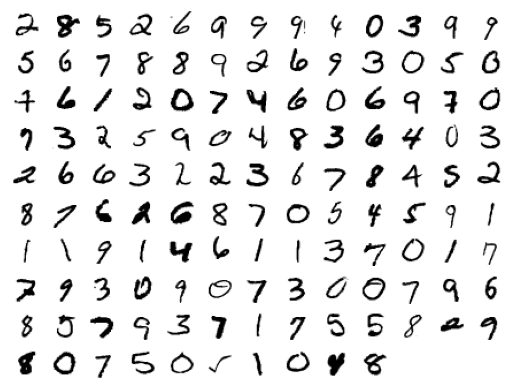

In [7]:
dataiter = iter(trainloader)
images, labels = next(dataiter)


print(images.size())
print(images.shape)
print(labels.size())
print(labels.shape)

path.ls()

# plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');
# plt.imshow(images[1].numpy().squeeze(), cmap='gray_r');
# plt.imshow(images[2].numpy().squeeze(), cmap='gray_r');

figure = plt.figure()
for index in range(1, 128):
  plt.subplot(10,13,index)
  plt.axis('off')
  plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [11]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): LogSoftmax(dim=1)
)


In [12]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
print(images)

logps = model(images)
loss = criterion(logps, labels)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [27]:
import time

In [30]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))


Epoch 0 - Training loss: 0.09368936425603147
Epoch 1 - Training loss: 0.09149941415198322
Epoch 2 - Training loss: 0.08968762875492893
Epoch 3 - Training loss: 0.08797932287523233
Epoch 4 - Training loss: 0.08586189654796744
Epoch 5 - Training loss: 0.08429176029143558
Epoch 6 - Training loss: 0.08265308933709857
Epoch 7 - Training loss: 0.08082013065293273
Epoch 8 - Training loss: 0.0794231861885359
Epoch 9 - Training loss: 0.0778691039156558
Epoch 10 - Training loss: 0.07628412325896307
Epoch 11 - Training loss: 0.07503617865476273
Epoch 12 - Training loss: 0.07368348187395632
Epoch 13 - Training loss: 0.07220337166985087
Epoch 14 - Training loss: 0.0710970155998016


In [66]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    print(len(ps))
    print(ps)

    ps.reshape(8,8)

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(8), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


In [69]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

Predicted Digit = 5


In [68]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)


    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9739


In [70]:
# Preparing Training Datasets
'''
- total of 60000 training images of size 28x28
- each digit has uniform distrubution
'''

train_images_list = get_image_files(path/'training')
train_x_list = [tensor(Image.open(img_path)) for img_path in train_images_list]
train_y_list = [int(img_path.parent.name) for img_path in train_images_list]
train_x = (torch.stack(train_x_list).float()/255).view(-1,28*28)
train_y = tensor(train_y_list).view(-1,1)

In [71]:
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [72]:
train_dset = list(zip(train_x, train_y))


In [73]:
valid_images_list = get_image_files(path/'testing')
valid_x_list = [tensor(Image.open(img_path)) for img_path in valid_images_list]
valid_y_list = [int(img_path.parent.name) for img_path in valid_images_list]
valid_x = (torch.stack(valid_x_list).float()/255).view(-1,28*28)
valid_y = tensor(valid_y_list).view(-1,1)

valid_x.shape, valid_y.shape

(torch.Size([10000, 784]), torch.Size([10000, 1]))

In [ ]:
valid_dset = list(zip(valid_x, valid_y))


In [74]:
#this is just to get a sense of the accuracy using resnet18
dls = ImageDataLoaders.from_folder(path, train='training',valid='testing')
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy, n_out=10)
learn.fit_one_cycle(1, 0.1)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.090158,0.358463,0.986000,01:32


In [75]:
train_dl = DataLoader(train_dset, batch_size=256)
#valid_dl = DataLoader(valid_dset, batch_size=256)

In [76]:
# function to calculate loss
def mnist_loss(pred, actual):
    l = nn.CrossEntropyLoss()
    return l(pred, actual.squeeze())

# function to calculate gradient
def calc_grad(xb, yb, model):
    pred = model(xb)
    loss = mnist_loss(pred, yb)
    loss.backward()
    return loss

# function to define accuracy
def batch_accuracy(pred, actual):
    digit_pred = pred.max(dim=1)[1]
    return (digit_pred==actual.squeeze()).float().mean()

#function to train 1 epoch and print average batch loss
def train_epoch(model):
    batch_loss = []
    for xb,yb in train_dl:
        batch_loss.append(calc_grad(xb, yb, model))
        opt.step()
        opt.zero_grad()
    return tensor(batch_loss).mean()

In [77]:
#Optimizer
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [78]:
#Simple 2 activations function NN
simple_net = nn.Sequential(
    nn.Linear(28*28,100),
    nn.ReLU(),
    nn.Linear(100,30),
    nn.ReLU(),
    nn.Linear(30,10)
)

In [79]:
#random accuracy
batch_accuracy(simple_net(valid_x),valid_y)

tensor(0.0905)

In [81]:
opt = BasicOptim(simple_net.parameters(), lr=0.003)


In [82]:
#function to train model for multiple epochs
def train_model(model,epochs):
    print('{:<10}{:<15}{:<15}'.format('Epoch','Training Loss','Validation Accuracy'))
    for i in range(epochs):
        avg_bl = train_epoch(model)
        print('{:<10}{:<15,.2f}{:<15,.2f}'.format(i,avg_bl.item(),batch_accuracy(model(valid_x),valid_y).item()))

In [ ]:
train_model(simple_net, 500)


Epoch     Training Loss  Validation Accuracy
0         2.29           0.21           
1         2.26           0.35           
2         2.23           0.41           
3         2.18           0.46           
4         2.12           0.49           
5         2.04           0.50           
6         1.93           0.49           
7         1.79           0.48           
8         1.60           0.47           
9         1.38           0.45           
10        1.15           0.46           
11        0.97           0.48           
12        0.84           0.51           
13        0.74           0.53           
14        0.67           0.55           
15        0.62           0.56           
16        0.59           0.58           
17        0.55           0.59           
18        0.53           0.60           
19        0.51           0.61           
20        0.49           0.62           
21        0.47           0.63           
22        0.46           0.63           
23        0.